In [1]:
import numpy as np
import pandas as pd
from radioReduction import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as op
import random


In [5]:
dt = pd.read_table('1314/dataTables/2M1314e3-LLRR.dat')
binned = binning(dt,sec=10)

def binPlot(Type='sec'):
    if Type == 'minutes':
        plt.errorbar(binned['dtmin'],binned['re'],yerr=binned['ure'],linestyle='None',color='k',label='_nolegend_')
        plt.scatter(binned['dtmin'],binned['re'],color='black',label='Data')
    else:
        plt.errorbar(binned['secs'],binned['re'],yerr=binned['ure'],linestyle='None',color='k',label='_nolegend_')
        plt.scatter(binned['secs'],binned['re'],color='black',label='Data') 
        

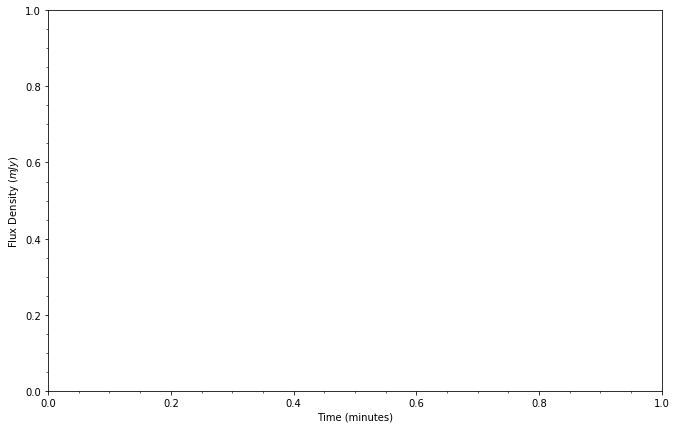

In [6]:
plt.figure(figsize=(11,7))

plt.xlabel('Time (minutes)')
plt.ylabel('Flux Density ($mJy$)')
plt.minorticks_on()
plt.savefig('plots/2M1314Flare.png')
plt.show()

In [7]:
rr = pd.read_table('1314/dataTables/2M1314e3-RR.dat')
ll = pd.read_table('1314/dataTables/2M1314e3-LL.dat')


rr = binning(rr,10)
ll = binning(ll,10)


In [8]:
stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
frac = stV/stI
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5
time = rr['dtmin']

In [9]:
print(np.max(stI))

2.1428304383267367


In [36]:
unPol = np.median(stI+stV)
print(unPol)

1.4860090861363404


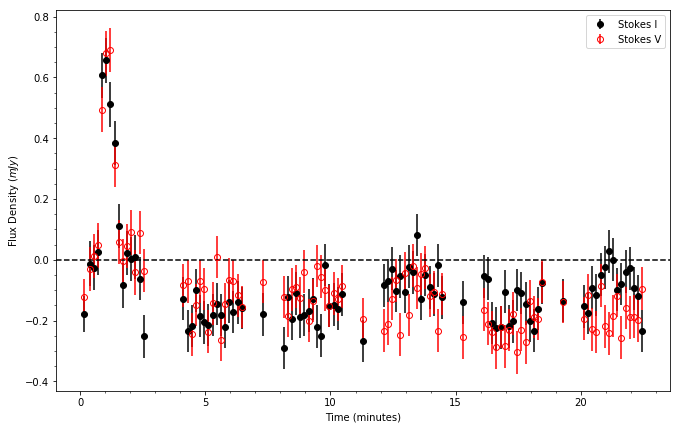

In [18]:
plt.figure(figsize=(11,7))
plt.errorbar(time,stI,yerr=stErr,color='k',fmt='o',linestyle='None',label='Stokes I')
plt.errorbar(time,stV,yerr=stErr,color='k',fmt='o',linestyle='None',markerfacecolor='None',label='Stokes V')
plt.axhline(y=0,color='k',linestyle='dashed')
plt.legend(loc='best')
plt.ylabel('Flux Density ($mJy$)')
plt.minorticks_on()
# ax[1].plot(time,100*frac,color='k')
# ax[1].axhline(y=0,color='k',linestyle='dashed')
# ax[1].set_ylabel('Frac Circ. Pol (%)')
plt.xlabel('Time (minutes)')
plt.savefig('plots/1314e3_Stokes.png')
plt.show()

In [14]:
nonFlaring = np.median(stI + stV)
flaring = stI - nonFlaring

print(nonFlaring)

1.4860090861363404


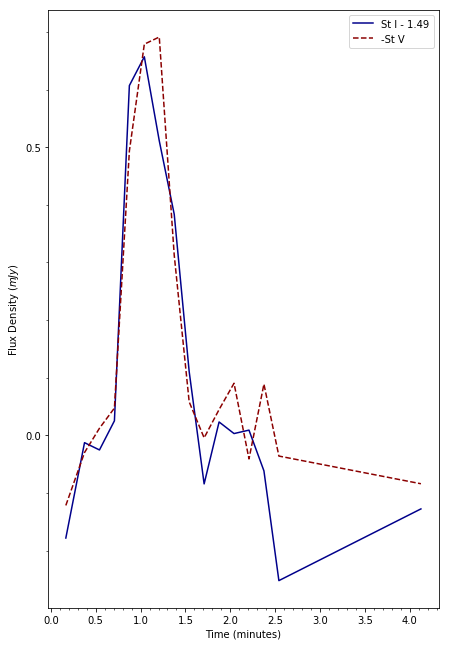

In [38]:
plt.figure(figsize=(7,11))
plt.plot(time[:16],stI[:16]-unPol,color='darkblue',linestyle='-',label='St I - 1.49')
plt.plot(time[:16],-stV[:16],color='darkred',linestyle='dashed',label='-St V')
plt.legend(loc='best')
plt.ylabel('Flux Density ($mJy$)')
plt.locator_params(axis='y',nbins=4)
plt.minorticks_on()
plt.xlabel('Time (minutes)')
#plt.savefig('plots/1314e3_Stokes.png')
plt.show()

In [28]:
time

0      0.166667
1      0.375000
2      0.541667
3      0.708333
4      0.875000
5      1.041667
6      1.208333
7      1.375000
8      1.541667
9      1.708333
10     1.875000
11     2.041667
12     2.208333
13     2.375000
14     2.541667
15     4.125000
16     4.291667
17     4.458333
18     4.625000
19     4.791667
20     4.958333
21     5.125000
22     5.291667
23     5.458333
24     5.625000
25     5.791667
26     5.958333
27     6.125000
28     6.291667
29     6.458333
        ...    
64    16.291667
65    16.458333
66    16.625000
67    16.791667
68    16.958333
69    17.125000
70    17.291667
71    17.458333
72    17.625000
73    17.791667
74    17.958333
75    18.125000
76    18.291667
77    18.458333
78    19.291667
79    20.125000
80    20.291667
81    20.458333
82    20.625000
83    20.791667
84    20.958333
85    21.125000
86    21.291667
87    21.458333
88    21.625000
89    21.791667
90    21.958333
91    22.125000
92    22.291667
93    22.458333
Name: dtmin, Length: 94,

In [2]:
low = pd.read_table('1314/dataTables/2M1314e3-5GHz.dat')
high = pd.read_table('1314/dataTables/2M1314e3-7GHz.dat')

low = low[low['nsamp']>500]
high = high[high['nsamp']>500]

low = binning(low,10)
high = binning(high,10)


/home/russell/projects/radio_project/radioReduction.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


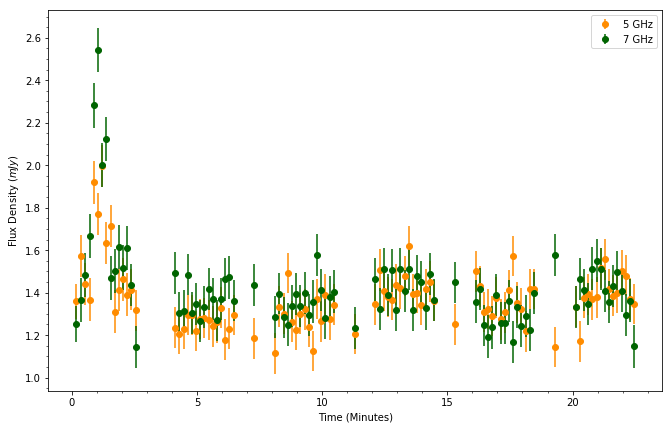

In [6]:
plt.figure(figsize=(11,7))
plt.errorbar(low['dtmin'],low['re'],yerr=low['ure'],color='darkorange',fmt='o',linestyle='None',label='5 GHz')
plt.errorbar(high['dtmin'],high['re'],yerr=high['ure'],color='darkgreen',fmt='o',linestyle='None',label='7 GHz')
plt.legend(loc='best')
plt.minorticks_on()
plt.xlabel('Time (Minutes)')
plt.ylabel('Flux Density ($mJy$)')
plt.savefig('plots/2M1314Flare_SED.png')
plt.show()

In [3]:
'''
Looking at the dynamic spectrum
'''
from pwkit.environments.casa import dftdynspec as ds
from pwkit.environments.casa.dftdynspec import Loader

path = '1314/2M1314e3_dynspec.dat'
ds = Loader(path)

Text(0.5, 0, 'Frequency')

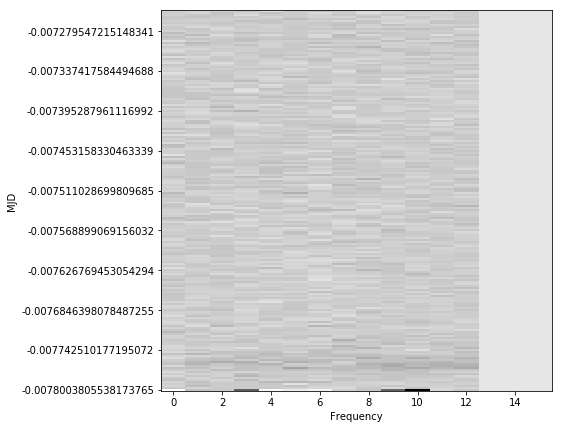

In [8]:
ticks = np.arange(0,ds.mjds.shape[0],20) # makes ticks

plt.figure(figsize=(7,7))
plt.yticks(ticks,labels=ds.mjds-np.mean(ds.mjds))
plt.imshow(ds.reals,aspect='auto',origin='lower',cmap='Greys')
plt.ylabel('MJD')
plt.xlabel('Frequency')